<a href="https://colab.research.google.com/github/bdebelle/FFpy/blob/master/data_munging_w_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd

In [183]:
# this is how you view what version of pandas we are running
pd.__version__


'1.1.2'

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/fp_projections.csv')

df.head(15)


,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5
5,5,Josh Allen,BUF,QB,0.0,0.0,0.0,2.9,115.1,623.5,6.8,525.4,310.4,3533.3,21.3,13.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.4
6,6,Kyler Murray,ARI,QB,0.0,0.0,0.0,1.9,87.3,475.4,3.2,565.4,365.7,3997.8,24.6,12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.4
7,7,Matt Ryan,ATL,QB,0.0,0.0,0.0,3.2,35.1,134.5,1.4,633.1,421.7,4713.5,28.1,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.3
8,8,Drew Brees,NO,QB,0.0,0.0,0.0,0.7,24.0,29.6,1.1,538.8,385.4,4226.4,30.6,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.3
9,9,Aaron Rodgers,GB,QB,0.0,0.0,0.0,2.4,44.7,188.4,1.2,568.8,357.9,4104.8,27.1,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.3


In [185]:
type(df)


pandas.core.frame.DataFrame

In [186]:
df.tail()


,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
681,75,Tim Boyle,GB,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,74,Garrett Gilbert,CLE,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,244,Vyncint Smith,NYJ,WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
684,127,Temarrick Hemingway,CAR,TE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,81,Chad Kelly,IND,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
df[:5]

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [188]:
df = df.iloc[:, 1:]
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [189]:
df.columns


Index(['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds', 'ReceivingTD',
       'FL', 'RushingAtt', 'RushingYds', 'RushingTD', 'PassingAtt',
       'PassingCmp', 'PassingYds', 'PassingTD', 'Int', 'FieldGoalsMade',
       'FieldGoalsAttempted', 'ExtraPointsMade', 'TotalSacks', 'TotalInt',
       'FumblesRecovered', 'FumblesForced', 'DefensiveTDs', 'SafetysForced',
       'PointsAllowed', 'FantasyPoints'],
      dtype='object')

In [190]:
', '.join(df.columns)

'Player, Team, Pos, Receptions, ReceivingYds, ReceivingTD, FL, RushingAtt, RushingYds, RushingTD, PassingAtt, PassingCmp, PassingYds, PassingTD, Int, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade, TotalSacks, TotalInt, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, FantasyPoints'

In [191]:
scoring_weights = {
    'receptions': 1, # PPR is 1 / standard is 0
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

In [192]:
# make sure you add paranthesis around the right side of this expression
# overriding the fantasy points column with our own league settings
df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )


In [193]:
df.head()


,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,469.5,302.5,3493.6,29.7,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.124
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,573.4,374.5,4604.6,34.6,10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.384
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,581.9,379.9,4551.9,29.2,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.416
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,530.2,349.3,4019.2,25.9,12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.888
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,500.2,329.0,3957.3,29.6,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.462


In [194]:
# mask our dataframe based off a position
"""
.loc is a way of getting back specified cross sections of your dataframe.
The syntax is as follows:
new_df = old_df.loc[row_indexer, column_indexer]
Where row_indexer can take the form of a boolean indexer.
For example, df['Pos'] == 'RB'
or, df['RushingAtt'] > 20
or, df['Pos'].isin(['QB', 'WR', 'RB', TE]) # check if a player's position is a skill position
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html # docs on loc
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html # docs on indexing
"""

rb_df = df.loc[df['Pos'] == 'RB']

rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,PassingAtt,PassingCmp,PassingYds,PassingTD,Int,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.06
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.79
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.75
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.78
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.98


In [195]:
base_columns = ['Player', 'Team', 'Pos']
rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL']

"""
Here, we can mask (what we are doing in the row indexer) and filter (what we are doing in the column indexer)
all in one line. Pass in (the boolean indexer, columns you'd like to keep) as a tuple.
Also recall that lists can be concatenated together.
"""
rb_df = df.loc[(df['Pos'] == 'RB', base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
12,Christian McCaffrey,CAR,RB,375.06,102.8,855.8,4.5,252.7,1130.8,8.5,2.2
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7


In [196]:
"""
The sort_values method of a DataFrame allows us sort our table by a given column.
The 'by' parameter of the function here is a required argument, and it should be the name of 
one of the columns in your table.
The 'ascending' argument is optional. If you want to sort your table from largest to smallest, set
ascending = False to sort in descending order. The object we get back from the sort_values function
is also a pandas DataFrame, and so we can chain methods as we do below with sort_values and head.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
"""

# sort RBs by RushingYds in descending order and get us back the top 15 rows.
rb_df.sort_values(by='RushingYds', ascending=False).head(15)


,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6
37,Nick Chubb,CLE,RB,224.94,24.8,191.5,1.1,275.4,1251.9,8.9,2.1
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5
41,Josh Jacobs,LV,RB,222.94,28.5,222.1,0.8,267.4,1186.3,8.8,2.0
36,Joe Mixon,CIN,RB,240.98,39.7,306.2,1.7,269.5,1178.6,7.7,1.8
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7
12,Christian McCaffrey,CAR,RB,375.06,102.8,855.8,4.5,252.7,1130.8,8.5,2.2
45,Chris Carson,SEA,RB,215.87,31.5,245.1,1.3,244.0,1100.6,7.8,2.4
38,Miles Sanders,PHI,RB,249.22,51.7,462.6,2.4,234.7,1050.6,6.0,2.1


In [197]:
"""
We can use the describe method to get summary/descriptive statistics about our DataFrame extremely quickly
We can also use transpose to switch the columns and index.
# describe docs
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# transpose documentation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
"""

# get us back descriptive stats about our rb_df and transpose the DataFrame.
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FantasyPoints,155.0,82.383871,83.097178,1.05,14.74,53.82,125.385,375.06
Receptions,155.0,17.506452,18.480993,0.40,4.05,10.60,24.000,102.80
ReceivingYds,155.0,140.300645,153.581122,3.10,30.30,85.70,198.100,855.80
ReceivingTD,155.0,0.708387,0.882143,0.00,0.10,0.30,1.000,4.50
RushingAtt,155.0,78.225161,82.304474,0.00,6.75,46.70,137.900,294.80
RushingYds,155.0,334.525161,359.322937,2.50,45.80,176.70,559.900,1481.10
RushingTD,155.0,2.428387,2.723008,0.00,0.30,1.20,3.900,12.10
FL,155.0,0.712903,0.757106,0.00,0.00,0.50,1.300,2.70


In [198]:
"""
This is how you get back a Series object, or column, from your DataFrame.
Here, we just want the first 10 rows of our Series object.
Documentation on pandas Series objects. Below, we cover some aggregate functions we can run
on these Series objects.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
"""

rb_df['RushingAtt'][:10]

12    252.7
23    271.2
25    288.0
26    294.8
30    262.7
33    201.4
35    211.2
36    269.5
37    275.4
38    234.7
Name: RushingAtt, dtype: float64

In [199]:
rb_df['RushingAtt'].max() # maximum of a Series column 


294.8

In [200]:
rb_df['RushingAtt'].std() # standard deviation of a Series column


82.30447400184613

In [201]:
rb_df['RushingAtt'].min() # minimum of a Series column


0.0

In [202]:
rb_df['RushingAtt'].std() # standard deviation of a Series column


82.30447400184613

In [203]:
rb_df['RushingAtt'].quantile(0.75) # Series 75th percentile for RushingAtt


137.89999999999998

In [204]:
rb_df['RushingAtt'].quantile(0.25) # Series 25th percentile for RushingAtt


6.75

In [205]:
"""
The rank method can be used to rank players based on a given column.
Set ascending = False to rank the column in descending order.
We will be using this rank players on value over replacement and also on ADP.
"""

rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

rb_df.sort_values(by='RushingTDRank').head(5)


,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL,RushingTDRank
26,Derrick Henry,TEN,RB,261.78,21.5,183.7,1.0,294.8,1481.1,12.1,2.4,1.0
30,Dalvin Cook,MIN,RB,289.98,58.1,519.8,1.9,262.7,1151.0,9.8,2.7,2.0
25,Ezekiel Elliott,DAL,RB,299.75,59.3,468.6,2.6,288.0,1261.9,9.5,2.6,3.0
39,Aaron Jones,GB,RB,239.98,43.2,353.3,2.1,211.7,962.5,9.3,1.6,4.0
23,Saquon Barkley,NYG,RB,310.79,66.2,536.9,2.7,271.2,1237.0,9.0,1.5,5.0


In [206]:
rb_df['RushingAtt'].value_counts()

0.0      7
10.4     2
13.8     2
164.3    2
0.9      2
25.0     2
4.9      2
1.0      2
3.7      2
1.2      2
4.5      2
35.0     2
94.2     1
77.9     1
5.3      1
1.7      1
41.7     1
3.4      1
105.2    1
3.9      1
262.7    1
56.6     1
13.3     1
252.7    1
98.2     1
211.2    1
275.4    1
234.7    1
211.7    1
267.4    1
198.7    1
169.7    1
222.7    1
97.2     1
156.2    1
204.3    1
26.6     1
104.9    1
4.2      1
0.6      1
29.0     1
244.0    1
180.5    1
170.5    1
146.0    1
85.0     1
168.9    1
97.5     1
70.5     1
45.5     1
70.0     1
38.0     1
3.0      1
29.5     1
11.5     1
4.3      1
159.9    1
11.0     1
17.5     1
12.9     1
13.1     1
5.0      1
2.0      1
1.5      1
16.2     1
144.4    1
29.6     1
5.8      1
135.7    1
145.7    1
85.1     1
4.7      1
37.1     1
47.6     1
115.8    1
13.2     1
94.9     1
154.6    1
7.6      1
208.9    1
4.1      1
142.1    1
1.4      1
140.1    1
37.7     1
204.9    1
1.9      1
95.3     1
170.1    1
94.3     1
76.9     1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


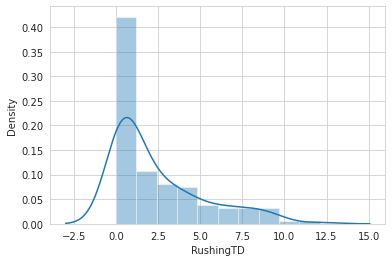

In [207]:
import seaborn as sns

sns.set_style('whitegrid')

sns.distplot(rb_df['RushingTD']);

In [208]:
henry = rb_df.loc[rb_df['Player'] == 'Derrick Henry']
# we can grab in
henry = henry.transpose()
# transpose the DataFrame
# this is how we rename the index.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.rename.html
henry.index = henry.index.rename('Category')

"""
This is how we rename the index in pandas. Note that length of our original columns was 1, and the list you 
set equal to df.columns must have the same length as the original column index. Otherwise, a ValueError will
be thrown.
"""
henry.colums =['Value']
henry

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,26
Category,
Player,Derrick Henry
Team,TEN
Pos,RB
FantasyPoints,261.78
Receptions,21.5
ReceivingYds,183.7
ReceivingTD,1
RushingAtt,294.8
RushingYds,1481.1


In [209]:
"""
values is how we get back a Numpy array representation of our data. Underneath the hood of Pandas,
DataFrames are multi-dimensional arrays. We will cover Numpy arrays in more detail in the machine learning section.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html
"""
rb_df.values

array([['Christian McCaffrey', 'CAR', 'RB', ..., 8.5, 2.2, 8.0],
       ['Saquon Barkley', 'NYG', 'RB', ..., 9.0, 1.5, 5.0],
       ['Ezekiel Elliott', 'DAL', 'RB', ..., 9.5, 2.6, 3.0],
       ...,
       ['Elijah McGuire', 'KC', 'RB', ..., 0.0, 0.0, 148.5],
       ['Trenton Cannon', 'CAR', 'RB', ..., 0.0, 0.0, 148.5],
       ['Damarea Crockett', 'GB', 'RB', ..., 0.0, 0.0, 148.5]],
      dtype=object)

In [210]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/STANDARD_ADP.csv')
adp_df.head()


,Unnamed: 0,PLAYER,POS,AVG
0,0,Christian McCaffrey,RB,1.0
1,1,Ezekiel Elliott,RB,2.5
2,2,Saquon Barkley,RB,2.5
3,3,Derrick Henry,RB,5.0
4,4,Michael Thomas,WR,5.5


In [211]:
adp_df = adp_df.iloc[:, 1:]
adp_df.head()


,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Ezekiel Elliott,RB,2.5
2,Saquon Barkley,RB,2.5
3,Derrick Henry,RB,5.0
4,Michael Thomas,WR,5.5


In [212]:
# Let's add a column for ADP rank, as the AVG column only tells us their average ADP doesn't tell us much
# we're more interested in the order of the AVG column than the average itself.

adp_df['ADP RANK'] = adp_df['AVG'].rank()
adp_df.head()


,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Ezekiel Elliott,RB,2.5,2.5
2,Saquon Barkley,RB,2.5,2.5
3,Derrick Henry,RB,5.0,4.0
4,Michael Thomas,WR,5.5,5.5


In [213]:
adp_df_cutoff = adp_df[:100]
# shape get's us back a tuple with the number of rows, and number of columns
# you can also use the Python built-in function len() to find the number of rows.

#print(len(adp_df_cutoff))

adp_df_cutoff.shape

(100, 4)

In [214]:
# initialize an empty dictionary.
# this is where we are going to save our replacement players

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

"""
We can iterate over our DataFrame using the iterrows method.
It's similar to the items method for dictionary looping.
Instead of key, values in dict.items(), we get back the index, row in df.items()
Here, we're using _ as the placeholder value for the index. Whenever you do not use a variable when looping,
you should use _ as a placeholder to tell yourself later and other people reading your code that this is a 
dummy variable. This is good style.
Using iterrows, we can iterate over our DataFrame, and get access to each row's column values.
We can access these column value much like we would values in a dictionary, using the [] notation.
Here, we are constantly re-setting the keys in the dict we instantiated above with the most recent player from 
our loop, if their position is in replacement_players keys (in other words, if they are a WR, RB, TE, or qb)
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
"""

for _, row in adp_df_cutoff.iterrows():

  position = row['POS'] #extract out the positionand player value from each row as we loop through it.
  player = row['PLAYER']

  if position in replacement_players: # if the position is in the dict's keys
    replacement_players[position] = player # set that player as the replacement player


replacement_players


{'QB': 'Carson Wentz',
 'RB': 'James White',
 'TE': 'Austin Hooper',
 'WR': 'Christian Kirk'}

In [215]:
"""
This is how we filter out columns in pandas without using loc.
The syntax is as follows
df = df[columns_wed_like_to_keep_in_list_form]
"""

df = df [['Player', 'Pos', 'Team', 'FantasyPoints']]
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.124
1,Patrick Mahomes,QB,KC,345.384
2,Dak Prescott,QB,DAL,318.416
3,Deshaun Watson,QB,HOU,312.888
4,Russell Wilson,QB,SEA,308.462


In [216]:
replacement_values = {} # initialize empty dictionary

for position, player_name in replacement_players.items():
  player = df.loc[df['Player'] == player_name]

  # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
    # we tack on a [0] to get the value we need.

  replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [217]:
replacement_values

{'QB': 274.89,
 'RB': 166.67999999999998,
 'TE': 144.42000000000002,
 'WR': 181.87}

In [218]:
"""
the isin method lets us check if a value is in a list
and can be passed as a boolean indexer / row filter / mask
here, we want to filter out all those rows who's position column is not in
['QB', 'RB', 'WR', 'TE']
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
""" 

# this will be explained in the next chapter

pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis = 1
)

In [219]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Lamar Jackson,QB,BAL,361.124,86.234
1,Patrick Mahomes,QB,KC,345.384,70.494
2,Dak Prescott,QB,DAL,318.416,43.526
3,Deshaun Watson,QB,HOU,312.888,37.998
4,Russell Wilson,QB,SEA,308.462,33.572


In [220]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
pd.set_option('display.max_rows', None)  ## turn off truncation of rows setting inherent to pandas

df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(10)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.06,208.38,1.0
34,Michael Thomas,WR,NO,333.18,151.31,2.0
23,Saquon Barkley,RB,NYG,310.79,144.11,3.0
25,Ezekiel Elliott,RB,DAL,299.75,133.07,4.0
33,Alvin Kamara,RB,NO,295.95,129.27,5.0
30,Dalvin Cook,RB,MIN,289.98,123.30,6.0
40,Davante Adams,WR,GB,300.45,118.58,7.0
56,Travis Kelce,TE,KC,255.44,111.02,8.0
44,Julio Jones,WR,ATL,286.36,104.49,9.0
26,Derrick Henry,RB,TEN,261.78,95.10,10.0


In [221]:
"""
the pandas groupby method allows us to groupby a specific column, called "splitting",
then apply a summary function over to each group. We can split this up by column as well, by tacking
on ['ColumName'] after grouping and before applying the summary function.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
"""

df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,-174.178337,122.762942,-274.89,-270.2020,-262.848,-31.194,86.234
RB,155.0,-84.296129,83.097178,-165.63,-151.9400,-112.860,-41.295,208.380
TE,128.0,-86.798203,54.454555,-144.42,-126.9925,-109.370,-55.760,111.020
WR,245.0,-103.774694,79.501235,-181.87,-170.6900,-140.930,-42.500,151.310


In [222]:
# standard score example. Notice axis is not set to 1 as we are applying a function across a column here.
# df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].mean()) / df['VOR'].std())

min_vor = df['VOR'].min()
max_vor = df['VOR'].max()
vor_range = max_vor - min_vor
df['VOR'] = df['VOR'].apply(lambda x: (x- min_vor) / vor_range)


In [223]:
df =df.sort_values(by='VOR', ascending=False)
df.head()

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0
34,Michael Thomas,WR,NO,333.18,0.881909,2.0
23,Saquon Barkley,RB,NYG,310.79,0.867010,3.0
25,Ezekiel Elliott,RB,DAL,299.75,0.844166,4.0
33,Alvin Kamara,RB,NO,295.95,0.836303,5.0


In [224]:
df.groupby('Pos')['VOR'].describe()


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,0.208396,0.254026,0.000000,0.009701,0.024918,0.504265,0.747251
RB,155.0,0.394384,0.171948,0.226085,0.254413,0.335278,0.483363,1.000000
TE,128.0,0.389206,0.112679,0.269973,0.306035,0.342500,0.453432,0.798539
WR,245.0,0.354078,0.164507,0.192480,0.215614,0.277195,0.480870,0.881909


In [225]:
df = df.rename({
    'VOR' : 'Value',
    'VOR Rank' : 'Value Rank'
}, axis=1)

df.head()


,Player,Pos,Team,FantasyPoints,Value,Value Rank
12,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0
34,Michael Thomas,WR,NO,333.18,0.881909,2.0
23,Saquon Barkley,RB,NYG,310.79,0.867010,3.0
25,Ezekiel Elliott,RB,DAL,299.75,0.844166,4.0
33,Alvin Kamara,RB,NO,295.95,0.836303,5.0


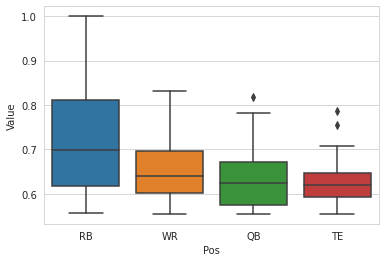

In [226]:
import seaborn as sns

num_teams = 12
num_spots = 14
draft_copy = df[:num_teams * num_spots]



sns.boxplot(x=df_copy['Pos'], y=df_copy['Value']);


In [227]:
adp_df = adp_df.rename({
    'PLAYER' : 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1) # let's rename some columns first.


adp_df.head()


,Player,Pos,Average ADP,ADP Rank
0,Christian McCaffrey,RB,1.0,1.0
1,Ezekiel Elliott,RB,2.5,2.5
2,Saquon Barkley,RB,2.5,2.5
3,Derrick Henry,RB,5.0,4.0
4,Michael Thomas,WR,5.5,5.5


In [228]:

"""
the merge function allows us to combine DataFrames together column wise on common columns.
Here, we are left joining. Which means any entries that exist in the right table (adp_df) but
do not exist in the left table (df) get dropped from the final table.
We want to join the two DataFrames together where the Player and Pos columns match up.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
Also, you may want to take a look at join, which is similar
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
"""

df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

df.head(100)


,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0,1.0,1.0
1,Michael Thomas,WR,NO,333.180,0.881909,2.0,5.5,5.5
2,Saquon Barkley,RB,NYG,310.790,0.867010,3.0,2.5,2.5
3,Ezekiel Elliott,RB,DAL,299.750,0.844166,4.0,2.5,2.5
4,Alvin Kamara,RB,NO,295.950,0.836303,5.0,6.0,7.0
5,Dalvin Cook,RB,MIN,289.980,0.823949,6.0,5.5,5.5
6,Davante Adams,WR,GB,300.450,0.814183,7.0,10.5,8.0
7,Travis Kelce,TE,KC,255.440,0.798539,8.0,17.0,17.5
8,Julio Jones,WR,ATL,286.360,0.785027,9.0,14.0,12.5
9,Derrick Henry,RB,TEN,261.780,0.765597,10.0,5.0,4.0


In [229]:
df['Diff in ADP and Value'] = df['ADP Rank'] - df['Value Rank']
df = df.dropna()
df.head(15)


,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0,1.0,1.0,0.0
1,Michael Thomas,WR,NO,333.180,0.881909,2.0,5.5,5.5,3.5
2,Saquon Barkley,RB,NYG,310.790,0.867010,3.0,2.5,2.5,-0.5
3,Ezekiel Elliott,RB,DAL,299.750,0.844166,4.0,2.5,2.5,-1.5
4,Alvin Kamara,RB,NO,295.950,0.836303,5.0,6.0,7.0,2.0
5,Dalvin Cook,RB,MIN,289.980,0.823949,6.0,5.5,5.5,-0.5
6,Davante Adams,WR,GB,300.450,0.814183,7.0,10.5,8.0,1.0
7,Travis Kelce,TE,KC,255.440,0.798539,8.0,17.0,17.5,9.5
8,Julio Jones,WR,ATL,286.360,0.785027,9.0,14.0,12.5,3.5
9,Derrick Henry,RB,TEN,261.780,0.765597,10.0,5.0,4.0,-6.0


In [230]:
draft_pool = df.sort_values(by='ADP Rank')[:196]

rb_df_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_df_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_df_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_df_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [231]:
#Top RB Sleepers
rb_df_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:20]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
124,Ryquell Armstead,RB,JAC,140.35,0.514329,125.0,210.0,215.0,90.0
151,Chris Thompson,RB,JAC,122.73,0.477870,152.0,193.0,199.0,47.0
142,Antonio Gibson,RB,WAS,129.26,0.491382,143.0,174.0,183.0,40.0
76,Tarik Cohen,RB,CHI,171.24,0.578248,77.0,111.5,105.0,28.0
31,Le'Veon Bell,RB,NYJ,217.90,0.674799,32.0,49.5,51.0,19.0
68,Ronald Jones II,RB,TB,179.79,0.595940,69.0,84.0,84.5,15.5
13,Austin Ekeler,RB,LAC,252.90,0.747222,14.0,23.0,24.5,10.5
85,James White,RB,NE,166.68,0.568812,86.5,97.0,95.5,9.0
37,James Conner,RB,PIT,214.98,0.668757,38.0,47.0,46.0,8.0
14,Miles Sanders,RB,PHI,249.22,0.739607,15.0,21.0,22.0,7.0


In [232]:
#Top WR Sleepers
wr_df_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:20]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
71,Jamison Crowder,WR,NYJ,192.28,0.590353,72.0,126.0,127.0,55.0
133,Hunter Renfrow,WR,LV,150.09,0.503052,134.0,178.0,186.0,52.0
155,Corey Davis,WR,TEN,135.67,0.473214,156.0,191.0,196.0,40.0
145,Allen Lazard,WR,GB,143.92,0.490285,146.0,175.5,184.0,38.0
181,Randall Cobb,WR,HOU,119.51,0.439775,182.0,213.0,219.0,37.0
122,DeSean Jackson,WR,PHI,157.73,0.518861,123.0,158.5,159.5,36.5
109,Anthony Miller,WR,CHI,164.21,0.532270,110.0,142.5,144.0,34.0
171,Brandon Aiyuk,WR,SF,127.54,0.456391,172.0,199.0,204.0,32.0
80,Diontae Johnson,WR,PIT,183.96,0.573137,81.0,116.0,111.0,30.0
24,Robert Woods,WR,LAR,241.44,0.692077,25.0,52.0,55.0,30.0


In [233]:
#Top 20 TE Sleepers
te_df_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:20]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
100,Chris Herndon IV,TE,NYJ,132.66,0.544478,101.0,172.0,178.5,77.5
158,Dawson Knox,TE,BUF,97.76,0.472262,158.5,217.0,223.0,64.5
141,Kyle Rudolph,TE,MIN,107.57,0.492561,142.0,202.0,205.5,63.5
112,Ian Thomas,TE,CAR,125.52,0.529704,113.0,164.0,169.5,56.5
83,Mike Gesicki,TE,MIA,145.07,0.570157,84.0,135.0,138.0,54.0
108,Jonnu Smith,TE,TEN,127.09,0.532953,109.0,148.5,151.5,42.5
138,Greg Olsen,TE,SEA,109.24,0.496017,139.0,172.5,180.5,41.5
110,Jack Doyle,TE,IND,126.34,0.531401,111.0,147.0,149.5,38.5
162,Irv Smith Jr.,TE,MIN,96.64,0.469944,163.0,196.0,201.0,38.0
172,O.J. Howard,TE,TB,89.32,0.454798,173.0,206.0,211.0,38.0


In [234]:
# Top 10 QB sleepers
qb_df_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:20]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
94,Cam Newton,QB,NE,267.554,0.553633,95.0,202.0,205.5,110.5
153,Derek Carr,QB,LV,229.760,0.475428,154.0,192.0,198.0,44.0
121,Gardner Minshew II,QB,JAC,251.500,0.520413,122.0,160.0,164.5,42.5
139,Teddy Bridgewater,QB,CAR,239.328,0.495226,140.0,170.0,176.5,36.5
106,Ryan Tannehill,QB,TEN,258.048,0.533962,107.0,130.5,132.0,25.0
103,Jared Goff,QB,LAR,260.608,0.539260,104.0,123.0,124.0,20.0
130,Jimmy Garoppolo,QB,SF,245.542,0.508085,131.0,145.0,145.5,14.5
56,Josh Allen,QB,BUF,297.482,0.615561,57.0,73.5,71.0,14.0
131,Kirk Cousins,QB,MIN,245.184,0.507344,132.0,141.5,142.0,10.0
163,Sam Darnold,QB,NYJ,226.866,0.469439,164.0,167.0,173.0,9.0


In [235]:
#Top Over-valued WR Players
wr_df_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:20]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
293,Devin Duvernay,WR,BAL,63.90,0.324705,294.0,216.0,222.0,-72.0
256,Denzel Mims,WR,NYJ,77.01,0.351832,257.0,176.0,185.0,-72.0
189,Alshon Jeffery,WR,PHI,112.02,0.424276,190.0,122.0,122.0,-68.0
179,Mecole Hardman,WR,KC,123.03,0.447059,180.0,127.0,128.0,-52.0
137,Jerry Jeudy,WR,DEN,148.03,0.498789,138.0,106.5,103.0,-35.0
111,Deebo Samuel,WR,SF,163.05,0.529869,112.0,83.0,83.0,-29.0
216,Kendrick Bourne,WR,SF,95.38,0.389844,217.0,182.0,189.0,-28.0
211,John Ross,WR,CIN,97.67,0.394583,212.0,180.0,187.0,-25.0
123,Emmanuel Sanders,WR,NO,156.89,0.517123,124.0,102.0,99.0,-25.0
144,Justin Jefferson,WR,MIN,144.34,0.491154,145.0,121.0,120.5,-24.5
